In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [16]:
wisc_df=pd.read_csv('wisconsin.csv')
wisc_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
wisc_df['diagnosis']=wisc_df['diagnosis'].map({'M':1,'B':0})

In [17]:
wisc_df_scaled=pd.DataFrame(preprocessing.scale(wisc_df.iloc[:,1:32]),columns=wisc_df.columns[1:32])
x=wisc_df_scaled.values
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [7]:
tsne=TSNE()
y=tsne.fit_transform(x)
print(y)

[[ 32.996964    5.6226315]
 [ 23.222267   -5.098716 ]
 [ 30.226961    2.4164824]
 ...
 [ 14.675852   -3.484245 ]
 [ 31.252525    6.866408 ]
 [-26.083673    4.4440913]]


Text(0.5, 1.0, 'Actual Cluster')

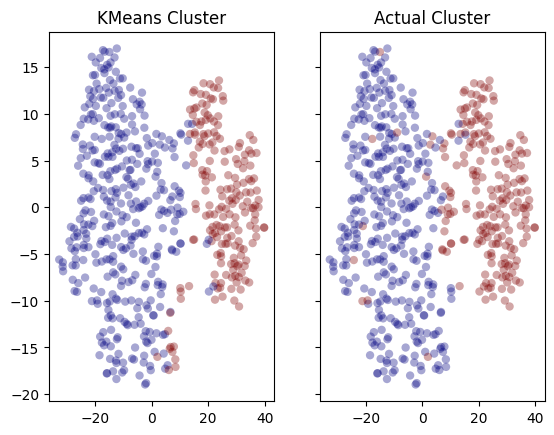

In [19]:
kmns=KMeans(n_clusters=2)
kY=kmns.fit_predict(x)
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(y[:,0],y[:,1],c=kY,cmap="jet",edgecolors="None",alpha=0.35)
ax1.set_title('KMeans Cluster')
ax2.scatter(y[:,0],y[:,1],c=wisc_df['diagnosis'],cmap="jet",edgecolors="None",alpha=0.35)
ax2.set_title('Actual Cluster')



Text(0.5, 1.0, 'Actual Cluster')

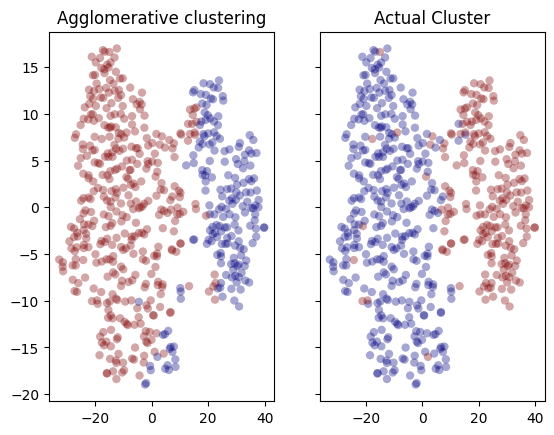

In [20]:
aggc=AgglomerativeClustering(n_clusters=2,linkage='ward')
kY=aggc.fit_predict(x)
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(y[:,0],y[:,1],c=kY,cmap="jet",edgecolors="None",alpha=0.35)
ax1.set_title('Agglomerative clustering')
ax2.scatter(y[:,0],y[:,1],c=wisc_df['diagnosis'],cmap="jet",edgecolors="None",alpha=0.35)
ax2.set_title('Actual Cluster')